In [22]:
%reset
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook
%matplotlib inline


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [23]:
import sqlite3

con = sqlite3.connect("rssi.sqlite")
df = pd.read_sql_query("SELECT homepi, upylounge, upybedroom, location from rssi", con)

In [24]:
df.head()

,homepi,upylounge,upybedroom,location
0,NaN,NaN,NaN,lounge
1,NaN,-80.0,-84.0,lounge
2,-70.0,-80.0,-84.0,lounge
3,-69.0,-80.0,-84.0,lounge
4,-69.0,-80.0,-84.0,lounge


In [25]:
colors = {'lounge' : 'b',
          'bedroom' : 'r' 
         }

c = [colors[val] for val in df.location]

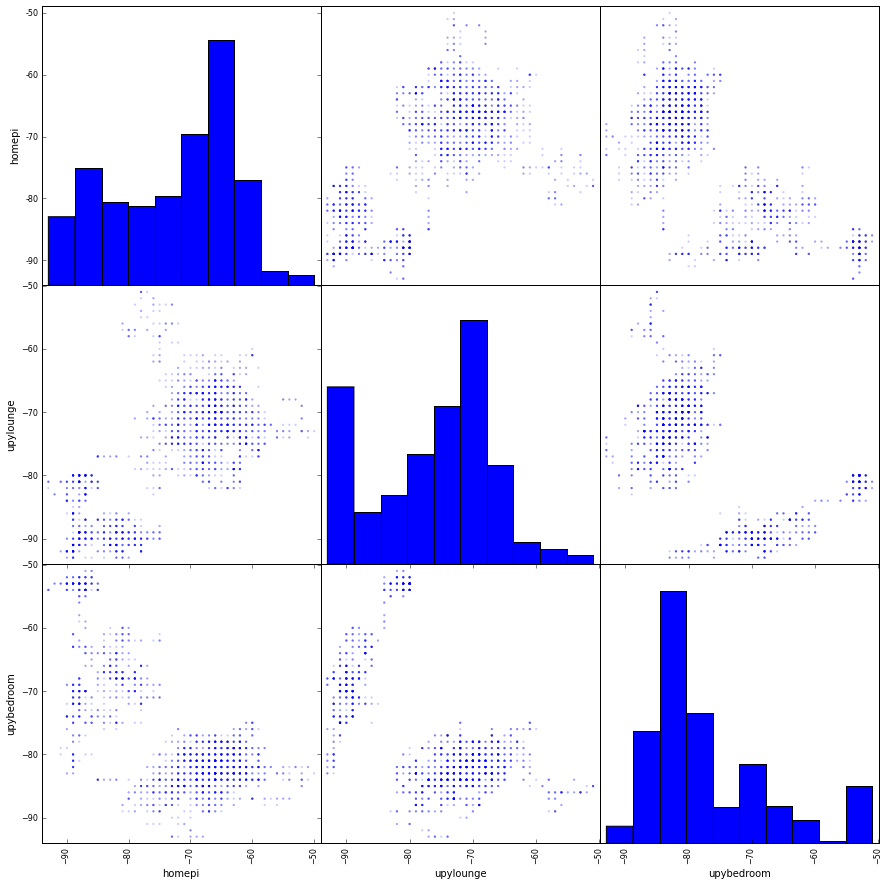

In [26]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist')

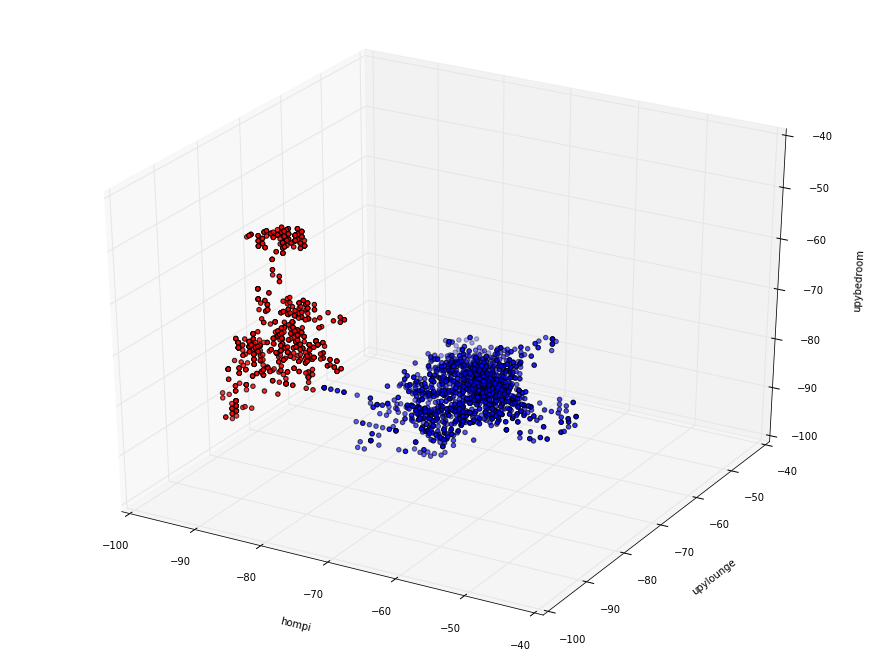

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.homepi, df.upylounge, df.upybedroom, c=c)
ax.set_xlabel('hompi')
ax.set_ylabel('upylounge')
ax.set_zlabel('upybedroom')
ax.legend()


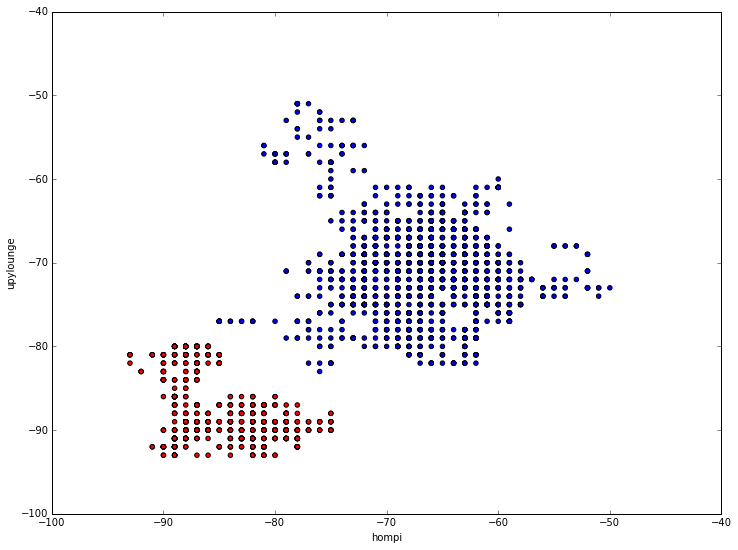

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.homepi, df.upylounge, c=c)
ax.set_xlabel('hompi')
ax.set_ylabel('upylounge')
ax.legend()

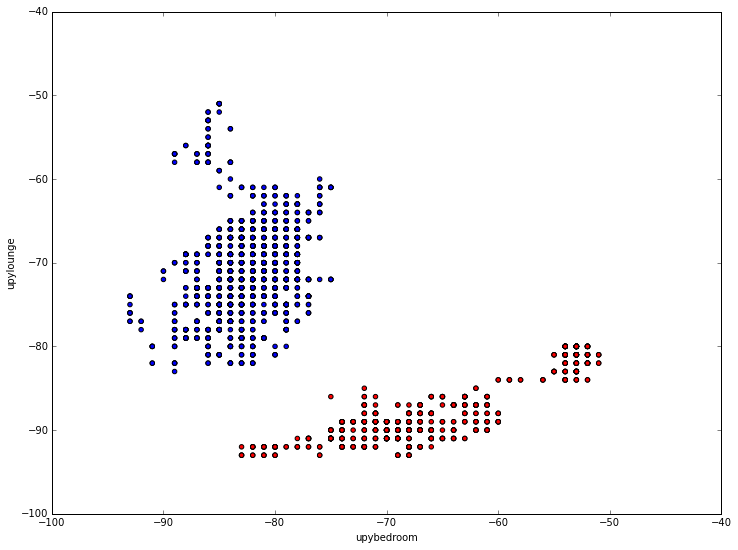

In [29]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.upybedroom, df.upylounge, c=c)
ax.set_xlabel('upybedroom')
ax.set_ylabel('upylounge')
ax.legend()

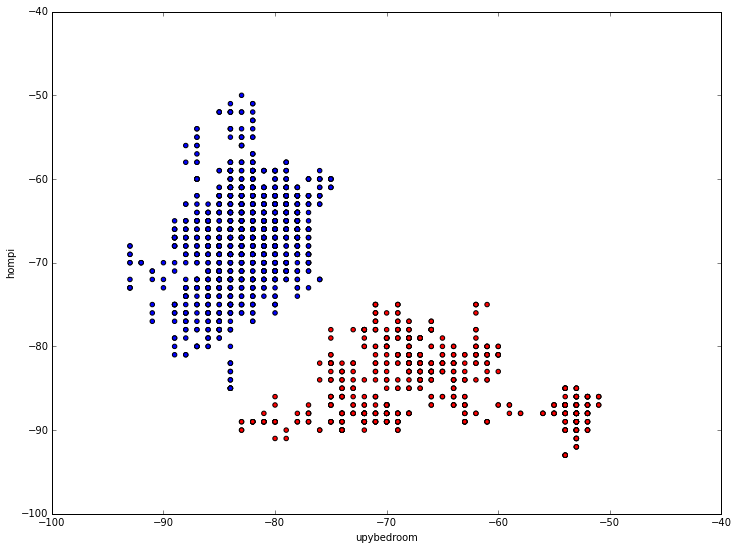

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(df.upybedroom, df.homepi, c=c)
ax.set_xlabel('upybedroom')
ax.set_ylabel('hompi')
ax.legend()